## EAS 503 Homework 2 Submission
Name - _SHUBHAM SHARMA_

**Make sure that you rename the notebook file to *replacewithubitname*_eas503_hw2.ipynb**


### Submission Details 
* **Due Date** - October 16, 2018 by 11:59 PM EST. All assignments have to be submitted using UBLearns.
* **Number of Problems** - 4 
* **Maximum points** - 50
* **Collaboration policy**
 - Every student has to submit individual homeworks
 - Any collaboration, in the form of discussion, with other members of the class is permitted, as long as the names of the collaborating members are explicitly stated on top of the submitted homework.
 - Any overlap with another submission or material from Internet will be awarded an F.
* **Late submission policy** - _No late submissions allowed_
* **Submission Format** - Enter code for each problem in the appropriate cell below. You may use multiple cells for a single problem to improve readability.

### Problem 1 - Inheritance and Encapsulation (15 points)

Consider a class of credit card accounts. A credit card account can have 2 types of credit cards:
1. Primary card  
2. Supplement card (Sup-card)

Consider the following attributes of the cards:

- A primary account is the main account to which multiple sup-cards are linked. 

- The primary credit card holder will be responsible for the bill payments for all the transactions on the primary card itself as well as all its supplimentary cards. 

- There are two types of credit limits:

    1. Individual card limit (limiting the expenditure per card)

    2. Account limit (limiting the total expenditure on primiary and the related sup-cards)

$$Account\ Limit >= Individual\ Card\ Limit$$

- There are two types of expenditure (or balances):

    1. Individual card expenditure (different for each card irrespective of primary or otherwise)

    2. Account expenditure (total spending on primary and all the related sup-cards)

$$Account\ expenditure = \Sigma(Individual\ card\ expenditure )$$ 


- Each sup-card has the same account limit as the primary credit card in that account. The account limit is the max of all card limts in that account. 

- Any transaction over the permitted limits must be denied i.e. transactions cannot lead to account expenditures being more than account limits. Also, transactions cannot lead to individual card expenditures being more than individual card limit.

For this problem, design a class `PrimaryCard` with all the account details and primary credit card details included in the class. Construct a sub-class of supplementary card holder, `SupplementaryCard`, linked to a primary credit card account. Ensure that the sensitive details of all the accounts (credit card numbers, balance, account limit etc.) must saved and accessed securely. 

Use the `Account_details.txt` file to access the account details for 15 credit cards. The transaction details for the month of october are provided in `transaction.txt` file. Design an algorithm to update the account balance on all the accounts and plot the final account balance on each day for the month of october.

Example:
Suppose you have an account with 5 cards in it (1 primary and 4 sup-cards). 

Primary card limit= $100

Each sup-card limit=$30

Restrictions:

- Account limit is $100 (max of 100 and 30)

- Primary card cannot spend more than $100

- All cards together cannot spend more than $100

- Any sup-card cannot spend more than $30

Transaction: $ 57.2 not allowed as limit reached for account number: 4952
Transaction: $ 500.0 not allowed as limit reached for account number: 4952
Transaction: $ 33.1 not allowed as limit reached for account number: 4952
Transaction: $ 37.7 not allowed as limit reached for account number: 4952
Transaction: $ 14.8 not allowed as limit reached for account number: 4952
Transaction: $ 38.7 not allowed as limit reached for account number: 4952
Transaction: $ 24.5 not allowed as limit reached for account number: 4952
Transaction: $ 24.1 not allowed as limit reached for account number: 4952
Transaction: $ 27.6 not allowed as limit reached for account number: 4952
Transaction: $ 70.9 not allowed as limit reached for account number: 4952
Transaction: $ 41.0 not allowed as limit reached for account number: 4952
Transaction: $ 45.9 not allowed as limit reached for account number: 4952
Transaction: $ 20.9 not allowed as limit reached for account number: 4952
Transaction: $ 99.2 not allowed as li

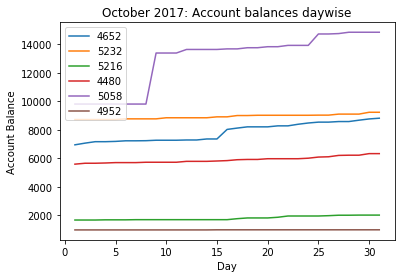

In [1]:
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline

class PrimaryCard:
    def __init__(self, custId, cardNum, accNum, cardType, limit, balance = 0):
        self.__custId = custId
        self.__cardNum = cardNum
        self.__accNum = accNum
        self.__limit = limit
        self.__balance = balance
        self.__cardType = cardType
        self.__creditLeft = self.__limit - self.__balance
        self.__history = [0] * 31

    def addBalance(self, accbal):
        if (accbal > self.__creditLeft):
            print("Transaction: $ "+ str(accbal) +" not allowed as limit reached for account number: " + self.__accNum)
            return False
        else:
            self.__balance += accbal
            self.__creditLeft -= accbal
            return True

    def reduceCredit(self, accbal):
        if accbal <= self.__creditLeft:
            self.__creditLeft -= accbal
            return True
        else:
            print("Transaction: $ "+ str(accbal) +" not allowed as limit reached for account number: " + self.__accNum)
            return False

    def updateHistory(self, d):
        self.__history[d - 1] = self.__limit - self.__creditLeft

    def generateStatement(self):
        for i in range(1, 31):
            if self.__history[i] == 0:
                self.__history[i] = self.__history[i - 1]

    def getHistory(self):
        return self.__history

    def getBalance(self):
        return self.__balance

    def getCreditLeft(self):
        return self.__creditLeft

    def getCustId(self):
        return self.__custId

    def getCardNum(self):
        return self.__cardNum

    def getAccNum(self):
        return self.__accNum

    def getCardType(self):
        return self.__cardType

    def getLimit(self):
        return self.__limit

class SupplementaryCard(PrimaryCard):
    def __init__(self, custId, cardName, accNum, cardType, limit, balance = 0):
        PrimaryCard.__init__(self, custId, cardName, accNum, cardType, limit, balance)
        self.__primcard = None

    def getPrimary(self):
        return self.__primcard

    def setPrimary(self, primary):
        self.__primcard = primary

    def addBalance(self, tran):
        if self.getCreditLeft() < tran:
            print("Transaction: $ "+ str(tran) + " not allowed as limit reached for card number: " + self.getCardNum())
            return False
        else:
            if self.__primcard.getCreditLeft() < tran:
                print("Transaction: $ "+ str(tran) + " not allowed as limit reached for account number: " + self.getAccNum())
                return False
            else:
                super().addBalance(tran)
                self.__primcard.reduceCredit(tran)
                return True

    def updateHistory(self, d):
        self.__primcard.updateHistory(d)


class main:
    def __init__(self, temp_bal = None):
        self.__prim = {} # dictionary of primary card objects
        self.__card_user = {} # dictionary of all card objects

        if temp_bal != None:
            read_card = []
            card_list = []
            with open(temp_bal, "r") as temp:
                next(temp)
                read_card = temp.read()
            read_card = read_card.split("\n")

            for i in read_card:
                i = i.split("\t")
                if len(i) < 6:
                    continue
                i[4] = float(i[4])
                i[5] = float(i[5])
                add_card = None

                if i[3] == "P":
                    add_card = PrimaryCard(i[0], i[1], i[2], i[3], i[4], i[5])
                    self.__prim[i[2]] = add_card
                else:
                    add_card = SupplementaryCard(i[0], i[1], i[2], i[3], i[4], i[5])

                self.__card_user[i[0]] = add_card
                card_list.append(add_card)

        
        for i in self.__card_user.values():
            if i.getCardType() == "S":
                i.setPrimary(self.__prim[i.getAccNum()]) 
                i.getPrimary().reduceCredit(i.getBalance()) 
            i.updateHistory(1)
        

    def day_tran(self, custId, amount, date):
        i = self.__card_user[custId]
        date = datetime.strptime(date, "%m/%d/%Y")
        if i.addBalance(amount):
            i.updateHistory(date.day)

    def getAccounts(self):
        return self.__prim.values()



obj = main("Account_details.txt")

with open("transaction.txt") as f:
    next(f)
    f = f.read().split("\n")[:-1]

    for i in f:
        i = i.split("\t")
        obj.day_tran(i[0], float(i[1]), i[2])

leg_accno = []
for i in obj.getAccounts():
    i.generateStatement()
    leg_accno.append(i.getAccNum())
    plt.plot(list(range(1, 32)), i.getHistory())

plt.title("October 2017: Account balances daywise")
plt.xlabel("Day")
plt.ylabel("Account Balance")
plt.legend(leg_accno)

### Problem 2 - Polynomials (15 Points)

Consider a general form of an nth order polynomial. You are asked to implement a polynomial of arbitrary degree using classes in python. For instance consider the polynomial:
$$7x^4 + 2x^2 + 5 = 0$$

For this implements the following steps:
1. Implement a class that represents a single term. 
2. Implement a class for the entire polynomial. 
3. Implement an operator ($*$) to multiply two single terms, a term and a polynomial, and two polynomials. (__Note__: _you can overload the $*$ operator in Python by defining a method called ``__mul__(self,other):`` and make it mutiply the ``self`` object with the ``other`` object)
4. Implement an operator(s) that enables addition of a term and a polynomial and/or two polynomials. (__Note__: _you can overload the  $+$  operator in Python by defining a method called ``__add__(self,other)``: and make it add the self object with the other object)
5. Implement the following two internal methods within ``Polynomial`` class:
    - ``order()``, which returns the order of the polynomial (as an ``int``).
    - ``solve()``, which returns solutions for the polynomial (a ``list`` of roots). Only do it for quadratic polynomials, and raise an exception for higher order polynomials.
6. Implement an external function that plots the polynomial on a domain of [-10,10] (you will have to use _matplotlib_ rountines for this).
7. Include a destructor function for the polynomial class.

Use the above class definitions and operators to generate the solutions (wherever needed) for the following set of polynomials:

1. $x^5 -3x^3 +9x^2+5x+6=0$
2. $x^3 -8x +5=0$
3. $x^2+9x+7=0$
3. Consider the following three polynomials: $f(x)=3x-1,$ $g(x)=x^2-2$ and $p(x)=8x^2 +4$. Plot the function $f(x)-g(x)*p(x)=0$ by taking $f,g,p$ as input functions. For this, use the ``__mul__(self,other)`` and ``__add__(self,other)`` methods.

Note: Here you are basically asked to define the basis for the vector space of real polynomials and define all the vector operations.

Destructor is called
The Polynomial is of order greater than 2
Destructor is called
The Polynomial is of order greater than 2
Destructor is called
The roots are:  [-0.859945055359741, -8.140054944640259]
Destructor is called
Destructor is called
Destructor is called
Destructor is called
Destructor is called
Destructor is called
Destructor is called
Destructor is called
Destructor is called
Destructor is called
Destructor is called
Destructor is called
Destructor is called
f(x) - g(x)*p(x): The tuples for coefficient and degree is as follows :  [(-8, 4), (12, 2), (3, 1), (7, 0)]
Destructor is called


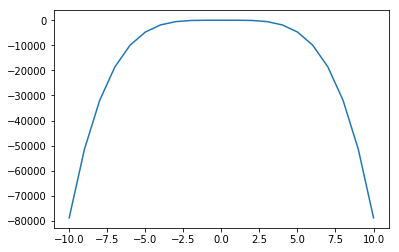

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import operator

class Polynomial:

    def __init__(self, CD=[]):
        CD.sort(key=operator.itemgetter(1), reverse=True)
        self.CD = CD

    def __add__(self, other):
        final_CD = []
        i = 0
        j = 0
        if len(self.CD) == 0:
            final_CD = other.CD

        elif len(other.CD) == 0:
            final_CD = self.CD
        while i < len(self.CD):
            while j < len(other.CD):
                if i == (len(self.CD)) and j <= (len(other.CD)):
                    for k in range(j, len(other.CD)):
                        final_CD.append(other.CD[k])
                        j = j + 1
                    break
                elif i <= (len(self.CD)) and j == (len(other.CD)):
                    for k in range(i, len(other.CD)):
                        final_CD.append(other.coef[k])
                        i = i + 1
                    break
                if self.CD[i][1] > other.CD[j][1]:
                    final_CD.append(self.CD[i])
                    i = i + 1
                elif self.CD[i][1] == other.CD[j][1]:
                    final_CD.append((self.CD[i][0] + other.CD[j][0], self.CD[i][1]))
                    i = i + 1
                    j = j + 1
                elif self.CD[i][1] < other.CD[j][1]:
                    final_CD.append(other.CD[j])
                    j = j + 1

        return Polynomial(final_CD)

    def __mul__(self, other):
        b = Polynomial([])
        for i in other.CD:
            a = []
            for j in self.CD:
                a.append((i[0] * j[0], i[1] + j[1]))
            b = b.__add__(Polynomial(a))
        return b

    def order(self):
        return self.CD[0][1]

    def solve(self):
        a = 0
        b = 0
        c = 0
        if self.order() <= 2:
            a = self.CD[0][0]
            try:
                b = self.CD[1][0]
            except Exception:
                b = 0
            try:
                c = self.CD[2][0]
            except Exception:
                c = 0
            if a > 0:
                try:
                    x1 = (-b + np.sqrt(np.power(b, 2) - 4 * a * c)) / (2 * a)
                    x2 = (-b - np.sqrt(np.power(b, 2) - 4 * a * c)) / (2 * a)
                    roots = [x1, x2]
                except ValueError:
                    roots = "Roots are imaginary"
        elif self.order() == 1:
            b = self.CD[0][0]
            try:
                c = self.CD[1][0]
            except Exception:
                c = 0
            x1 = -c / b
            roots = [x1]
        elif self.order() > 2:
            raise Exception("The Polynomial is of order greater than 2")
        return roots

    def __plot__(self):
        x = list(range(-10, 11))
        y = []
        for value in x:
            sum1 = 0
            for i in range(len(self.CD)):

                sum1 = sum1 + self.CD[i][0] * value ** self.CD[i][1]

            y.append(sum1)
        plt.plot(x, y)
        plt.show(block=True)


    def __del__(self):
        print("Destructor is called")

try:
    p3 = Polynomial([(1, 5), (-3, 3), (9, 2), (5, 1), (6, 0)])
    p3.solve()
except:
    print("The Polynomial is of order greater than 2")

try:
    p4 = Polynomial([(1, 3), (-8, 5), (5, 0)])
    p4.solve()
except:
    print("The Polynomial is of order greater than 2")

try:
    p5 = Polynomial([(1, 2), (9, 1), (7, 0)])
    p5.solve()
    print("The roots are: ", p5.solve())
except:
    print("The Polynomial is of order greater than 2")
    
class Singleterm:

    def __init__(self, CD=[]):
        self.CD = CD

    def __term__(self, x):
        self.poly_term = self.CD[0][0] * x ** self.CD[0][1]
        return self.poly_term

p6 = Polynomial([(3, 1), (-1, 0)])
p7 = Polynomial([(1, 2), (-2, 0)])
p9 = Polynomial([(-1, 0)])
p8 = Polynomial([(8, 2), (4, 0)])
temp = (p7 * p8 * p9)

temp1 = temp + p6
print("f(x) - g(x)*p(x): The tuples for coefficient and degree is as follows : ", temp1.CD)

p10 = Polynomial(temp1.CD)
p10.__plot__()

### Problem 3 - Random Walk (10 Points)

Imagine you are standing at (0,0) on the real plane. At every time step, assume you either take a step of random length, say `c`, in one of the four directions (right, left, up, down) with equal probability. This means that after one time step, your new location can be (c,0), (-c,0), (0,c) or (0,-c) with equal probability.

For this, create a class `Walker`. The class needs to store the following information:
- current position of the walker, where the position is a 2-tuple. You can initialize it to (0,0)
- path taken so far by the walker (initially this list will only contain the current position)
- method called ``getDirection()`` that determines the direction for the next step (one out of four possible directions: right, left, up, down). To determine the direction, sample a random value from the set {1,2,3,4} using `np.random.randint(0,N)` and assign each outcome to a unit step movement in a particular direction.
- method called ``getLength()`` that determines the length for the next step (one out of six possible lengths: 0,1,2,3,4,5). To determine the length, sample a random value from the set {1,2,3,4,5,6} using `np.random.randint(0,N)` and assign each outcome to a step length.
- method called ``walk()`` which changes the current position of the walker in a specifed direction. Make sure to update the path field to incorporate the next position.

After implementing the `Walker` class, you need to conduct the following experiment.
Suppose you want to figure out, how many steps will it take for the walker to go outside a pre-defined perimeter (centered at (0,0)). You will have simulate a random walk and keep checking the current position to figure that out. 

Write a code to run the following simulation:
Starting from (0,0), have your walker randomly walk around (using the defined ``walk()`` method), until it steps out of a rectangular area with vertices as: (-20,-20), (-20,20), (20,20), (20,-20). Count the number of steps taken before the walker leaves the area. Repeat the simulation 5 times and report the average number of steps taken by the walker before it exits the area.

Plot the path taken in each of the 5 simulation runs (you should all five walks in one graph using different colors).

The average number of steps taken by the walker before it exits the area: 77.2


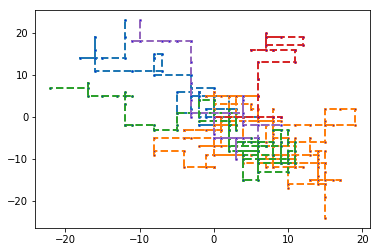

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

class Walker():
    
    def getLength(self):
        L = np.random.randint(0,6)
        return(L)
    
    def getDirection(self):
        
        D = {1:(1,0),2:(-1,0),3:(0,1),4:(0,-1)}
        d = np.random.randint(1,5)
        return D[d]
    
    def walk(self):
        
        count = 0
        P = (0,0)
        path = [P]
        x,y = 0,0
        while abs(P[0])<20 and abs(P[1])<20:
            L = self.getLength()
            D = self.getDirection()
            a,b = D
        
            if(b == 0):
                x = (a * L) + x
                P = (x,y)
            if(a == 0):
                y = (b * L) + y
                P = (x,y)
            path.append(P)
            count = count + 1
            
        return (count, path)
                   
obj = Walker()
c = 0
for i in range(0,5):
    steps, d = obj.walk()
    c = c + steps
    data = pd.DataFrame(d)
    plt.plot(data[0], data[1], linestyle='dashed',linewidth=2,marker='o',markerfacecolor='blue',markersize=2)
    
print("The average number of steps taken by the walker before it exits the area: " + str(c/5))

### Problem 4 - Inverse Transform Sampling (10 Points)

Random sample for any distribution can be generated from a random sample from uniform distribution. This can be done using **Inverse transform Sampling**. For example, suppose you want to create a sample of size $n$ from a _Kumaraswamy distribution_. To obtain this sample:
1. Generate a sample of size $n$ from Uniform[0,1].
2. Identify the inverse of the CDF function of the distribution of your choice (this needs to be done manually and implemented). In our example, it is Kumaraswamy distribution. Call this function ``inverseCDFKumaraswamy()``. Note that you are not allowed to use any routines from ``np.random`` package except ``np.random.uniform``here. This function should take two arguments, first is the sample point, and the second is the distribution parameter value, $\alpha$ and $\beta$.
3. Apply the ``inverseCDFKumaraswamy()`` function on each of the $n$ sample points that you generated in step 1. The $n$ outputs will be the sample from your desired distribution. 

The Probability Density Function (PDF) of the Kumaraswamy distribution is
$$f(x)=\alpha*\beta*x^{\alpha-1}*(1-x^\alpha)^{\beta-1}$$

The Cumulative Distribution Function (CDF) of the Kumaraswamy distribution is
$$F(x)= 1-(1-x^\alpha)^\beta$$

Using the above implementation, generate a sample of size 100 from a Kumaraswamy ($\alpha=2$, $\beta=5$) distribution.

Your output must include the mean, variance and distribution plot (a histogram) for the generated sample. 

Mean:  0.3456622390828332
Variance:  0.030124268509891423


Text(0,0.5,'Frequency of X')

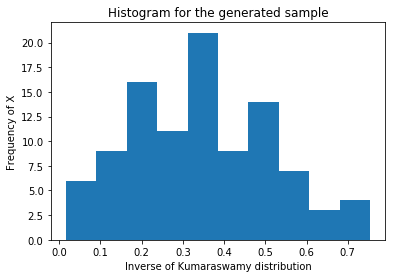

In [6]:
import matplotlib.pyplot as plt
import numpy as np

def inverseCDFKumaraswamy(Y,p):
    a, b = p
    X=((1-((1-Y)**(1/b)))**(1/a))
    return X

l = []
n = 100
a = 2
b = 5
p = (a,b)


spu = np.random.uniform(0,1,n)

for i in spu:
    I = inverseCDFKumaraswamy(i,p)
    l.append(I)

print("Mean: ", np.mean(l))
print("Variance: ", np.var(l))

plt.hist(l)
plt.title("Histogram for the generated sample")
plt.xlabel("Inverse of Kumaraswamy distribution")
plt.ylabel("Frequency of X")
    